In [1]:
from pylab import *
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import keras
from keras.callbacks import History
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import seaborn as sns

plt.style.use('seaborn')
sns.set()

%matplotlib inline

Using TensorFlow backend.


In [2]:
data = pd.read_csv('data.csv')
columns = ['Sex', 'Age', 'BodyweightKg', 'Squat1Kg',
           'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
           'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg',
           'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
           'Best3DeadliftKg', 'TotalKg', 'Wilks', 'Tested']

numericGender = {'M': 1.0, 'F': 0.0}
numericEquipment = {'Raw': 0.0, 'Wraps': 1.0, 'Multi-ply': 1.0,
                    'Single-ply': 1.0, 'Straps': 1.0}

data.Sex = [numericGender[item] for item in data.Sex]
data.Equipment = [numericEquipment[item] 
                  for item in data.Equipment]

data['Tested'].fillna(0.0, inplace=True)
data['Tested'].replace('Yes', 1.0, inplace=True)

data.drop(columns=['Name', 'AgeClass', 'Date', 
                   'WeightClassKg', 'Place', 'Squat4Kg', 
                   'Bench4Kg', 'Deadlift4Kg'], inplace=True)

data.dropna(subset=['Best3SquatKg', 'Best3BenchKg',
                    'Best3DeadliftKg'], inplace=True)
data.dropna(subset=['Squat1Kg', 'Squat2Kg', 
                    'Squat3Kg'], how='all', inplace=True)
data.dropna(subset=['Bench1Kg','Bench2Kg',
                    'Bench3Kg'], how='all', inplace=True)
data.dropna(subset=['Deadlift1Kg', 'Deadlift2Kg', 
                    'Deadlift3Kg'], how='all', inplace= True)
data.fillna(0.0, inplace=True)

x = data.filter(items=columns).astype(float)
y = data['Equipment']

In [3]:
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=18, 
                    kernel_initializer='glorot_uniform', 
                    activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])
    return model

In [22]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier
                   (build_fn=create_baseline, epochs=300, 
                    batch_size=256, verbose=2)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(pipeline, x, y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % 
      (results.mean()*100, results.std()*100))

Epoch 1/300
 - 1s - loss: 0.4722 - accuracy: 0.7872
Epoch 2/300
 - 1s - loss: 0.4231 - accuracy: 0.8222
Epoch 3/300
 - 1s - loss: 0.4145 - accuracy: 0.8261
Epoch 4/300
 - 1s - loss: 0.4105 - accuracy: 0.8283
Epoch 5/300
 - 1s - loss: 0.4076 - accuracy: 0.8295
Epoch 6/300
 - 1s - loss: 0.4059 - accuracy: 0.8305
Epoch 7/300
 - 1s - loss: 0.4035 - accuracy: 0.8312
Epoch 8/300
 - 1s - loss: 0.4024 - accuracy: 0.8312
Epoch 9/300
 - 1s - loss: 0.4010 - accuracy: 0.8317
Epoch 10/300
 - 1s - loss: 0.4003 - accuracy: 0.8316
Epoch 11/300
 - 1s - loss: 0.3997 - accuracy: 0.8322
Epoch 12/300
 - 1s - loss: 0.3988 - accuracy: 0.8324
Epoch 13/300
 - 1s - loss: 0.3982 - accuracy: 0.8326
Epoch 14/300
 - 1s - loss: 0.3981 - accuracy: 0.8329
Epoch 15/300
 - 1s - loss: 0.3976 - accuracy: 0.8329
Epoch 16/300
 - 1s - loss: 0.3972 - accuracy: 0.8333
Epoch 17/300
 - 1s - loss: 0.3971 - accuracy: 0.8331
Epoch 18/300
 - 1s - loss: 0.3969 - accuracy: 0.8329
Epoch 19/300
 - 1s - loss: 0.3964 - accuracy: 0.8334
Ep

Epoch 155/300
 - 1s - loss: 0.3894 - accuracy: 0.8356
Epoch 156/300
 - 1s - loss: 0.3900 - accuracy: 0.8356
Epoch 157/300
 - 1s - loss: 0.3897 - accuracy: 0.8354
Epoch 158/300
 - 1s - loss: 0.3893 - accuracy: 0.8358
Epoch 159/300
 - 1s - loss: 0.3897 - accuracy: 0.8358
Epoch 160/300
 - 1s - loss: 0.3897 - accuracy: 0.8355
Epoch 161/300
 - 1s - loss: 0.3898 - accuracy: 0.8350
Epoch 162/300
 - 1s - loss: 0.3892 - accuracy: 0.8355
Epoch 163/300
 - 1s - loss: 0.3893 - accuracy: 0.8357
Epoch 164/300
 - 1s - loss: 0.3898 - accuracy: 0.8359
Epoch 165/300
 - 1s - loss: 0.3895 - accuracy: 0.8353
Epoch 166/300
 - 1s - loss: 0.3896 - accuracy: 0.8355
Epoch 167/300
 - 1s - loss: 0.3897 - accuracy: 0.8357
Epoch 168/300
 - 1s - loss: 0.3897 - accuracy: 0.8354
Epoch 169/300
 - 1s - loss: 0.3896 - accuracy: 0.8360
Epoch 170/300
 - 1s - loss: 0.3893 - accuracy: 0.8357
Epoch 171/300
 - 1s - loss: 0.3895 - accuracy: 0.8355
Epoch 172/300
 - 1s - loss: 0.3896 - accuracy: 0.8358
Epoch 173/300
 - 1s - loss: 

Epoch 7/300
 - 1s - loss: 0.4033 - accuracy: 0.8309
Epoch 8/300
 - 1s - loss: 0.4023 - accuracy: 0.8317
Epoch 9/300
 - 1s - loss: 0.4014 - accuracy: 0.8318
Epoch 10/300
 - 1s - loss: 0.4011 - accuracy: 0.8325
Epoch 11/300
 - 1s - loss: 0.3999 - accuracy: 0.8323
Epoch 12/300
 - 1s - loss: 0.4000 - accuracy: 0.8324
Epoch 13/300
 - 1s - loss: 0.3990 - accuracy: 0.8325
Epoch 14/300
 - 1s - loss: 0.3990 - accuracy: 0.8324
Epoch 15/300
 - 1s - loss: 0.3985 - accuracy: 0.8328
Epoch 16/300
 - 1s - loss: 0.3979 - accuracy: 0.8331
Epoch 17/300
 - 1s - loss: 0.3978 - accuracy: 0.8332
Epoch 18/300
 - 1s - loss: 0.3971 - accuracy: 0.8333
Epoch 19/300
 - 1s - loss: 0.3968 - accuracy: 0.8332
Epoch 20/300
 - 1s - loss: 0.3965 - accuracy: 0.8336
Epoch 21/300
 - 1s - loss: 0.3966 - accuracy: 0.8337
Epoch 22/300
 - 1s - loss: 0.3963 - accuracy: 0.8336
Epoch 23/300
 - 1s - loss: 0.3962 - accuracy: 0.8335
Epoch 24/300
 - 1s - loss: 0.3958 - accuracy: 0.8334
Epoch 25/300
 - 1s - loss: 0.3956 - accuracy: 0.8

Epoch 161/300
 - 1s - loss: 0.3883 - accuracy: 0.8366
Epoch 162/300
 - 1s - loss: 0.3879 - accuracy: 0.8362
Epoch 163/300
 - 1s - loss: 0.3883 - accuracy: 0.8367
Epoch 164/300
 - 1s - loss: 0.3878 - accuracy: 0.8366
Epoch 165/300
 - 1s - loss: 0.3879 - accuracy: 0.8364
Epoch 166/300
 - 1s - loss: 0.3883 - accuracy: 0.8366
Epoch 167/300
 - 1s - loss: 0.3878 - accuracy: 0.8370
Epoch 168/300
 - 1s - loss: 0.3882 - accuracy: 0.8362
Epoch 169/300
 - 1s - loss: 0.3879 - accuracy: 0.8363
Epoch 170/300
 - 1s - loss: 0.3879 - accuracy: 0.8370
Epoch 171/300
 - 1s - loss: 0.3876 - accuracy: 0.8368
Epoch 172/300
 - 1s - loss: 0.3879 - accuracy: 0.8370
Epoch 173/300
 - 1s - loss: 0.3875 - accuracy: 0.8374
Epoch 174/300
 - 1s - loss: 0.3880 - accuracy: 0.8369
Epoch 175/300
 - 1s - loss: 0.3878 - accuracy: 0.8368
Epoch 176/300
 - 1s - loss: 0.3876 - accuracy: 0.8367
Epoch 177/300
 - 1s - loss: 0.3877 - accuracy: 0.8368
Epoch 178/300
 - 1s - loss: 0.3877 - accuracy: 0.8370
Epoch 179/300
 - 1s - loss: 

 - 1s - loss: 0.3995 - accuracy: 0.8327
Epoch 14/300
 - 1s - loss: 0.3991 - accuracy: 0.8323
Epoch 15/300
 - 1s - loss: 0.3988 - accuracy: 0.8329
Epoch 16/300
 - 1s - loss: 0.3986 - accuracy: 0.8328
Epoch 17/300
 - 1s - loss: 0.3979 - accuracy: 0.8330
Epoch 18/300
 - 1s - loss: 0.3976 - accuracy: 0.8329
Epoch 19/300
 - 1s - loss: 0.3974 - accuracy: 0.8328
Epoch 20/300
 - 1s - loss: 0.3971 - accuracy: 0.8336
Epoch 21/300
 - 1s - loss: 0.3972 - accuracy: 0.8326
Epoch 22/300
 - 1s - loss: 0.3968 - accuracy: 0.8330
Epoch 23/300
 - 1s - loss: 0.3961 - accuracy: 0.8333
Epoch 24/300
 - 1s - loss: 0.3963 - accuracy: 0.8334
Epoch 25/300
 - 1s - loss: 0.3959 - accuracy: 0.8332
Epoch 26/300
 - 1s - loss: 0.3957 - accuracy: 0.8338
Epoch 27/300
 - 1s - loss: 0.3955 - accuracy: 0.8332
Epoch 28/300
 - 1s - loss: 0.3951 - accuracy: 0.8337
Epoch 29/300
 - 1s - loss: 0.3952 - accuracy: 0.8340
Epoch 30/300
 - 1s - loss: 0.3948 - accuracy: 0.8336
Epoch 31/300
 - 1s - loss: 0.3953 - accuracy: 0.8340
Epoch 

Epoch 167/300
 - 1s - loss: 0.3887 - accuracy: 0.8358
Epoch 168/300
 - 1s - loss: 0.3886 - accuracy: 0.8358
Epoch 169/300
 - 1s - loss: 0.3886 - accuracy: 0.8361
Epoch 170/300
 - 1s - loss: 0.3886 - accuracy: 0.8359
Epoch 171/300
 - 1s - loss: 0.3886 - accuracy: 0.8359
Epoch 172/300
 - 1s - loss: 0.3886 - accuracy: 0.8361
Epoch 173/300
 - 1s - loss: 0.3888 - accuracy: 0.8365
Epoch 174/300
 - 1s - loss: 0.3886 - accuracy: 0.8361
Epoch 175/300
 - 1s - loss: 0.3888 - accuracy: 0.8361
Epoch 176/300
 - 1s - loss: 0.3883 - accuracy: 0.8366
Epoch 177/300
 - 1s - loss: 0.3885 - accuracy: 0.8362
Epoch 178/300
 - 1s - loss: 0.3884 - accuracy: 0.8362
Epoch 179/300
 - 1s - loss: 0.3887 - accuracy: 0.8356
Epoch 180/300
 - 1s - loss: 0.3885 - accuracy: 0.8365
Epoch 181/300
 - 1s - loss: 0.3887 - accuracy: 0.8359
Epoch 182/300
 - 1s - loss: 0.3882 - accuracy: 0.8363
Epoch 183/300
 - 1s - loss: 0.3879 - accuracy: 0.8360
Epoch 184/300
 - 1s - loss: 0.3885 - accuracy: 0.8362
Epoch 185/300
 - 1s - loss: 

 - 1s - loss: 0.3971 - accuracy: 0.8337
Epoch 20/300
 - 1s - loss: 0.3963 - accuracy: 0.8338
Epoch 21/300
 - 1s - loss: 0.3965 - accuracy: 0.8336
Epoch 22/300
 - 1s - loss: 0.3961 - accuracy: 0.8340
Epoch 23/300
 - 1s - loss: 0.3962 - accuracy: 0.8339
Epoch 24/300
 - 1s - loss: 0.3953 - accuracy: 0.8342
Epoch 25/300
 - 1s - loss: 0.3957 - accuracy: 0.8345
Epoch 26/300
 - 1s - loss: 0.3959 - accuracy: 0.8338
Epoch 27/300
 - 1s - loss: 0.3953 - accuracy: 0.8342
Epoch 28/300
 - 1s - loss: 0.3951 - accuracy: 0.8344
Epoch 29/300
 - 1s - loss: 0.3948 - accuracy: 0.8346
Epoch 30/300
 - 1s - loss: 0.3953 - accuracy: 0.8340
Epoch 31/300
 - 1s - loss: 0.3945 - accuracy: 0.8339
Epoch 32/300
 - 1s - loss: 0.3949 - accuracy: 0.8344
Epoch 33/300
 - 1s - loss: 0.3946 - accuracy: 0.8344
Epoch 34/300
 - 1s - loss: 0.3945 - accuracy: 0.8343
Epoch 35/300
 - 1s - loss: 0.3944 - accuracy: 0.8342
Epoch 36/300
 - 1s - loss: 0.3945 - accuracy: 0.8336
Epoch 37/300
 - 1s - loss: 0.3941 - accuracy: 0.8344
Epoch 

Epoch 173/300
 - 1s - loss: 0.3901 - accuracy: 0.8361
Epoch 174/300
 - 1s - loss: 0.3899 - accuracy: 0.8359
Epoch 175/300
 - 1s - loss: 0.3901 - accuracy: 0.8357
Epoch 176/300
 - 1s - loss: 0.3898 - accuracy: 0.8359
Epoch 177/300
 - 1s - loss: 0.3901 - accuracy: 0.8361
Epoch 178/300
 - 1s - loss: 0.3903 - accuracy: 0.8357
Epoch 179/300
 - 1s - loss: 0.3901 - accuracy: 0.8356
Epoch 180/300
 - 1s - loss: 0.3897 - accuracy: 0.8361
Epoch 181/300
 - 1s - loss: 0.3900 - accuracy: 0.8360
Epoch 182/300
 - 1s - loss: 0.3899 - accuracy: 0.8364
Epoch 183/300
 - 1s - loss: 0.3896 - accuracy: 0.8365
Epoch 184/300
 - 1s - loss: 0.3897 - accuracy: 0.8360
Epoch 185/300
 - 1s - loss: 0.3895 - accuracy: 0.8362
Epoch 186/300
 - 1s - loss: 0.3895 - accuracy: 0.8362
Epoch 187/300
 - 1s - loss: 0.3902 - accuracy: 0.8359
Epoch 188/300
 - 1s - loss: 0.3895 - accuracy: 0.8355
Epoch 189/300
 - 1s - loss: 0.3897 - accuracy: 0.8362
Epoch 190/300
 - 1s - loss: 0.3896 - accuracy: 0.8361
Epoch 191/300
 - 1s - loss: 

Epoch 26/300
 - 1s - loss: 0.3955 - accuracy: 0.8337
Epoch 27/300
 - 1s - loss: 0.3956 - accuracy: 0.8334
Epoch 28/300
 - 1s - loss: 0.3954 - accuracy: 0.8338
Epoch 29/300
 - 1s - loss: 0.3950 - accuracy: 0.8342
Epoch 30/300
 - 1s - loss: 0.3947 - accuracy: 0.8343
Epoch 31/300
 - 1s - loss: 0.3948 - accuracy: 0.8339
Epoch 32/300
 - 1s - loss: 0.3948 - accuracy: 0.8338
Epoch 33/300
 - 1s - loss: 0.3943 - accuracy: 0.8347
Epoch 34/300
 - 1s - loss: 0.3942 - accuracy: 0.8344
Epoch 35/300
 - 1s - loss: 0.3941 - accuracy: 0.8344
Epoch 36/300
 - 1s - loss: 0.3942 - accuracy: 0.8345
Epoch 37/300
 - 1s - loss: 0.3943 - accuracy: 0.8347
Epoch 38/300
 - 1s - loss: 0.3942 - accuracy: 0.8343
Epoch 39/300
 - 1s - loss: 0.3936 - accuracy: 0.8345
Epoch 40/300
 - 1s - loss: 0.3937 - accuracy: 0.8345
Epoch 41/300
 - 1s - loss: 0.3937 - accuracy: 0.8342
Epoch 42/300
 - 1s - loss: 0.3938 - accuracy: 0.8344
Epoch 43/300
 - 1s - loss: 0.3934 - accuracy: 0.8346
Epoch 44/300
 - 1s - loss: 0.3931 - accuracy: 

 - 1s - loss: 0.3889 - accuracy: 0.8357
Epoch 180/300
 - 1s - loss: 0.3894 - accuracy: 0.8359
Epoch 181/300
 - 1s - loss: 0.3891 - accuracy: 0.8361
Epoch 182/300
 - 1s - loss: 0.3893 - accuracy: 0.8360
Epoch 183/300
 - 1s - loss: 0.3893 - accuracy: 0.8360
Epoch 184/300
 - 1s - loss: 0.3887 - accuracy: 0.8363
Epoch 185/300
 - 1s - loss: 0.3893 - accuracy: 0.8359
Epoch 186/300
 - 1s - loss: 0.3890 - accuracy: 0.8366
Epoch 187/300
 - 1s - loss: 0.3890 - accuracy: 0.8358
Epoch 188/300
 - 1s - loss: 0.3892 - accuracy: 0.8359
Epoch 189/300
 - 1s - loss: 0.3891 - accuracy: 0.8364
Epoch 190/300
 - 1s - loss: 0.3892 - accuracy: 0.8365
Epoch 191/300
 - 1s - loss: 0.3889 - accuracy: 0.8365
Epoch 192/300
 - 1s - loss: 0.3889 - accuracy: 0.8361
Epoch 193/300
 - 1s - loss: 0.3885 - accuracy: 0.8365
Epoch 194/300
 - 1s - loss: 0.3891 - accuracy: 0.8366
Epoch 195/300
 - 1s - loss: 0.3890 - accuracy: 0.8362
Epoch 196/300
 - 1s - loss: 0.3886 - accuracy: 0.8360
Epoch 197/300
 - 1s - loss: 0.3888 - accur

In [23]:
model_standardised = create_baseline()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=3, shuffle=True)

standard = StandardScaler()

x_train = standard.fit_transform(x_train)
x_test = standard.fit_transform(x_test)

log_standardised = History()
model_standardised.fit(x_train, y_train, epochs=300, batch_size=256, 
                       validation_data=(x_test, y_test), 
                       callbacks=[log_standardised], verbose=2)


r = model_standardised.predict(x_test)
r_round = [round(test[0]) for test in r]

successes = 0
for result, value in zip(r_round, y_test):
    if result == value:
        successes+=1
accuracy = abs(round((((len(r_round) - successes)
                       / len(r_round)) * 100) - 100, 5))

print("Accurate predictions:", successes)
print("Accuracy:", accuracy, "%")

Train on 158635 samples, validate on 67987 samples
Epoch 1/300
 - 1s - loss: 0.4700 - accuracy: 0.7901 - val_loss: 0.4204 - val_accuracy: 0.8248
Epoch 2/300
 - 1s - loss: 0.4251 - accuracy: 0.8203 - val_loss: 0.4105 - val_accuracy: 0.8290
Epoch 3/300
 - 1s - loss: 0.4171 - accuracy: 0.8245 - val_loss: 0.4053 - val_accuracy: 0.8316
Epoch 4/300
 - 1s - loss: 0.4129 - accuracy: 0.8267 - val_loss: 0.4033 - val_accuracy: 0.8329
Epoch 5/300
 - 1s - loss: 0.4097 - accuracy: 0.8276 - val_loss: 0.4014 - val_accuracy: 0.8333
Epoch 6/300
 - 1s - loss: 0.4075 - accuracy: 0.8290 - val_loss: 0.4006 - val_accuracy: 0.8337
Epoch 7/300
 - 1s - loss: 0.4054 - accuracy: 0.8300 - val_loss: 0.4000 - val_accuracy: 0.8343
Epoch 8/300
 - 1s - loss: 0.4043 - accuracy: 0.8301 - val_loss: 0.3976 - val_accuracy: 0.8346
Epoch 9/300
 - 1s - loss: 0.4033 - accuracy: 0.8304 - val_loss: 0.3968 - val_accuracy: 0.8350
Epoch 10/300
 - 1s - loss: 0.4030 - accuracy: 0.8305 - val_loss: 0.3962 - val_accuracy: 0.8359
Epoch 11

Epoch 87/300
 - 1s - loss: 0.3920 - accuracy: 0.8344 - val_loss: 0.3904 - val_accuracy: 0.8369
Epoch 88/300
 - 1s - loss: 0.3921 - accuracy: 0.8349 - val_loss: 0.3896 - val_accuracy: 0.8374
Epoch 89/300
 - 1s - loss: 0.3922 - accuracy: 0.8346 - val_loss: 0.3896 - val_accuracy: 0.8374
Epoch 90/300
 - 1s - loss: 0.3919 - accuracy: 0.8341 - val_loss: 0.3890 - val_accuracy: 0.8380
Epoch 91/300
 - 1s - loss: 0.3920 - accuracy: 0.8343 - val_loss: 0.3917 - val_accuracy: 0.8370
Epoch 92/300
 - 1s - loss: 0.3921 - accuracy: 0.8340 - val_loss: 0.3899 - val_accuracy: 0.8379
Epoch 93/300
 - 1s - loss: 0.3921 - accuracy: 0.8341 - val_loss: 0.3907 - val_accuracy: 0.8371
Epoch 94/300
 - 1s - loss: 0.3917 - accuracy: 0.8345 - val_loss: 0.3903 - val_accuracy: 0.8373
Epoch 95/300
 - 1s - loss: 0.3916 - accuracy: 0.8345 - val_loss: 0.3894 - val_accuracy: 0.8371
Epoch 96/300
 - 1s - loss: 0.3914 - accuracy: 0.8347 - val_loss: 0.3905 - val_accuracy: 0.8374
Epoch 97/300
 - 1s - loss: 0.3921 - accuracy: 0.83

Epoch 173/300
 - 1s - loss: 0.3899 - accuracy: 0.8355 - val_loss: 0.3891 - val_accuracy: 0.8380
Epoch 174/300
 - 1s - loss: 0.3900 - accuracy: 0.8358 - val_loss: 0.3904 - val_accuracy: 0.8374
Epoch 175/300
 - 1s - loss: 0.3896 - accuracy: 0.8355 - val_loss: 0.3880 - val_accuracy: 0.8379
Epoch 176/300
 - 1s - loss: 0.3900 - accuracy: 0.8355 - val_loss: 0.3886 - val_accuracy: 0.8376
Epoch 177/300
 - 1s - loss: 0.3893 - accuracy: 0.8357 - val_loss: 0.3879 - val_accuracy: 0.8382
Epoch 178/300
 - 1s - loss: 0.3891 - accuracy: 0.8361 - val_loss: 0.3881 - val_accuracy: 0.8379
Epoch 179/300
 - 1s - loss: 0.3893 - accuracy: 0.8359 - val_loss: 0.3883 - val_accuracy: 0.8381
Epoch 180/300
 - 1s - loss: 0.3892 - accuracy: 0.8354 - val_loss: 0.3886 - val_accuracy: 0.8379
Epoch 181/300
 - 1s - loss: 0.3896 - accuracy: 0.8357 - val_loss: 0.3885 - val_accuracy: 0.8379
Epoch 182/300
 - 1s - loss: 0.3892 - accuracy: 0.8352 - val_loss: 0.3891 - val_accuracy: 0.8384
Epoch 183/300
 - 1s - loss: 0.3892 - acc

Epoch 259/300
 - 1s - loss: 0.3883 - accuracy: 0.8361 - val_loss: 0.3887 - val_accuracy: 0.8379
Epoch 260/300
 - 1s - loss: 0.3878 - accuracy: 0.8364 - val_loss: 0.3878 - val_accuracy: 0.8382
Epoch 261/300
 - 1s - loss: 0.3881 - accuracy: 0.8361 - val_loss: 0.3887 - val_accuracy: 0.8383
Epoch 262/300
 - 1s - loss: 0.3884 - accuracy: 0.8362 - val_loss: 0.3885 - val_accuracy: 0.8378
Epoch 263/300
 - 1s - loss: 0.3881 - accuracy: 0.8356 - val_loss: 0.3894 - val_accuracy: 0.8377
Epoch 264/300
 - 1s - loss: 0.3881 - accuracy: 0.8357 - val_loss: 0.3885 - val_accuracy: 0.8378
Epoch 265/300
 - 1s - loss: 0.3880 - accuracy: 0.8358 - val_loss: 0.3879 - val_accuracy: 0.8380
Epoch 266/300
 - 1s - loss: 0.3881 - accuracy: 0.8356 - val_loss: 0.3876 - val_accuracy: 0.8382
Epoch 267/300
 - 1s - loss: 0.3880 - accuracy: 0.8361 - val_loss: 0.3890 - val_accuracy: 0.8379
Epoch 268/300
 - 1s - loss: 0.3883 - accuracy: 0.8360 - val_loss: 0.3881 - val_accuracy: 0.8380
Epoch 269/300
 - 1s - loss: 0.3878 - acc

In [24]:
model_no = create_baseline()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=3, shuffle=True)

log_no = History()
model_no.fit(x_train, y_train, epochs=300, batch_size=256, 
             validation_data=(x_test, y_test), 
             callbacks=[log_no], verbose=1)


r = model_no.predict(x_test)
r_round = [round(test[0]) for test in r]

successes = 0
for result, value in zip(r_round, y_test):
    if result == value:
        successes+=1
accuracy = abs(round((((len(r_round) - successes)
                       / len(r_round)) * 100) - 100, 5))

print("Accurate predictions:", successes)
print("Accuracy:", accuracy, "%")

Train on 158635 samples, validate on 67987 samples
Epoch 1/300
158635/158635 [==============================] - 1s 8us/step - loss: 3.5202 - accuracy: 0.5773 - val_loss: 0.6669 - val_accuracy: 0.6598
Epoch 2/300
158635/158635 [==============================] - 1s 7us/step - loss: 0.7318 - accuracy: 0.6339 - val_loss: 0.5826 - val_accuracy: 0.6990
Epoch 3/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.6298 - accuracy: 0.6722 - val_loss: 0.5816 - val_accuracy: 0.6939
Epoch 4/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.5881 - accuracy: 0.7003 - val_loss: 0.5430 - val_accuracy: 0.7288
Epoch 5/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.5692 - accuracy: 0.7135 - val_loss: 0.5300 - val_accuracy: 0.7420
Epoch 6/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.5590 - accuracy: 0.7196 - val_loss: 0.5411 - val_accuracy: 0.7359
Epoch 7/300
158635/158635 [============================

158635/158635 [==============================] - 1s 6us/step - loss: 0.4198 - accuracy: 0.8225 - val_loss: 0.4136 - val_accuracy: 0.8286
Epoch 56/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4192 - accuracy: 0.8220 - val_loss: 0.4184 - val_accuracy: 0.8229
Epoch 57/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4188 - accuracy: 0.8225 - val_loss: 0.4081 - val_accuracy: 0.8302
Epoch 58/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4190 - accuracy: 0.8225 - val_loss: 0.4114 - val_accuracy: 0.8308
Epoch 59/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4182 - accuracy: 0.8229 - val_loss: 0.4091 - val_accuracy: 0.8296
Epoch 60/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4194 - accuracy: 0.8217 - val_loss: 0.4104 - val_accuracy: 0.8293
Epoch 61/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4181 - accuracy: 0.8229 - val

158635/158635 [==============================] - 1s 7us/step - loss: 0.4145 - accuracy: 0.8240 - val_loss: 0.4084 - val_accuracy: 0.8299
Epoch 110/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4156 - accuracy: 0.8241 - val_loss: 0.4082 - val_accuracy: 0.8299
Epoch 111/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4154 - accuracy: 0.8241 - val_loss: 0.4101 - val_accuracy: 0.8295
Epoch 112/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4146 - accuracy: 0.8246 - val_loss: 0.4133 - val_accuracy: 0.8274
Epoch 113/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4143 - accuracy: 0.8243 - val_loss: 0.4054 - val_accuracy: 0.8320
Epoch 114/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4144 - accuracy: 0.8244 - val_loss: 0.4151 - val_accuracy: 0.8253
Epoch 115/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4150 - accuracy: 0.8247

158635/158635 [==============================] - 1s 6us/step - loss: 0.4138 - accuracy: 0.8253 - val_loss: 0.4063 - val_accuracy: 0.8303
Epoch 164/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4132 - accuracy: 0.8248 - val_loss: 0.4060 - val_accuracy: 0.8315
Epoch 165/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4144 - accuracy: 0.8244 - val_loss: 0.4080 - val_accuracy: 0.8292
Epoch 166/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4133 - accuracy: 0.8251 - val_loss: 0.4036 - val_accuracy: 0.8324
Epoch 167/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4131 - accuracy: 0.8256 - val_loss: 0.4053 - val_accuracy: 0.8322
Epoch 168/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4139 - accuracy: 0.8248 - val_loss: 0.4085 - val_accuracy: 0.8301
Epoch 169/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4129 - accuracy: 0.8251

158635/158635 [==============================] - 1s 6us/step - loss: 0.4123 - accuracy: 0.8253 - val_loss: 0.4053 - val_accuracy: 0.8313
Epoch 218/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4123 - accuracy: 0.8257 - val_loss: 0.4083 - val_accuracy: 0.8309
Epoch 219/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4123 - accuracy: 0.8252 - val_loss: 0.4070 - val_accuracy: 0.8303
Epoch 220/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4125 - accuracy: 0.8257 - val_loss: 0.4061 - val_accuracy: 0.8306
Epoch 221/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4123 - accuracy: 0.8257 - val_loss: 0.4083 - val_accuracy: 0.8287
Epoch 222/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4122 - accuracy: 0.8255 - val_loss: 0.4075 - val_accuracy: 0.8305
Epoch 223/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4125 - accuracy: 0.8258

158635/158635 [==============================] - 1s 6us/step - loss: 0.4119 - accuracy: 0.8257 - val_loss: 0.4046 - val_accuracy: 0.8323
Epoch 272/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4117 - accuracy: 0.8256 - val_loss: 0.4050 - val_accuracy: 0.8310
Epoch 273/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4117 - accuracy: 0.8256 - val_loss: 0.4050 - val_accuracy: 0.8321
Epoch 274/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4115 - accuracy: 0.8261 - val_loss: 0.4067 - val_accuracy: 0.8311
Epoch 275/300
158635/158635 [==============================] - 1s 8us/step - loss: 0.4117 - accuracy: 0.8258 - val_loss: 0.4068 - val_accuracy: 0.8306
Epoch 276/300
158635/158635 [==============================] - 1s 7us/step - loss: 0.4117 - accuracy: 0.8262 - val_loss: 0.4054 - val_accuracy: 0.8311
Epoch 277/300
158635/158635 [==============================] - 1s 9us/step - loss: 0.4125 - accuracy: 0.8255

(0.23062220448547105, 0.7)

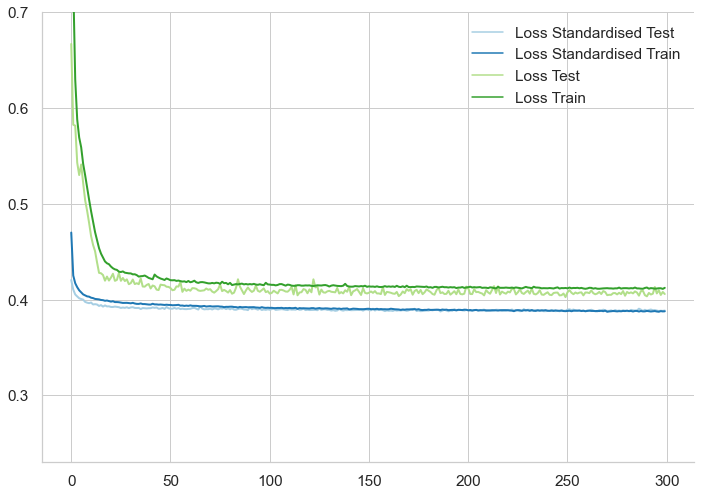

In [29]:
log_data = pd.DataFrame({'Loss Standardised Test': log_standardised.history['val_loss'],
                         'Loss Standardised Train': log_standardised.history['loss'],
                         'Loss Test': log_no.history['val_loss'],
                         'Loss Train': log_no.history['loss']})
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")
sns.despine()
sns.set_context('notebook', font_scale=1.4)
palette = sns.color_palette("Paired", 4)
ax = sns.lineplot(data=log_data, linewidth=2, 
                  palette=palette, dashes=False)
ax.axes.set_ylim(None,0.7)

(0.75, 0.8516359984874725)

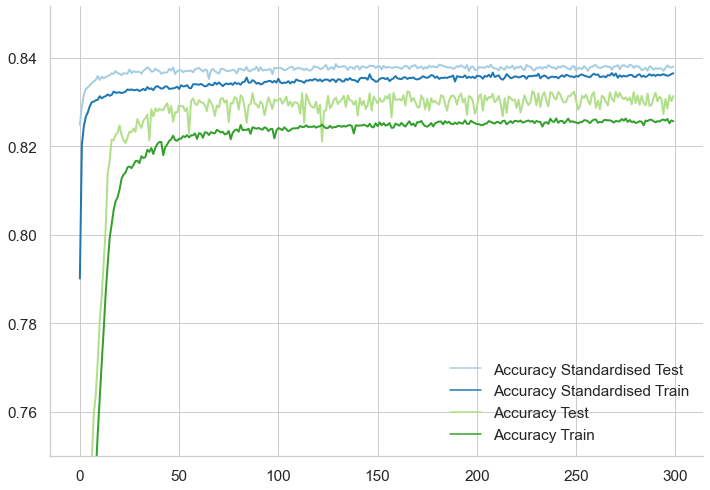

In [26]:
log_data = pd.DataFrame({'Accuracy Standardised Test': log_standardised.history['val_accuracy'],
                         'Accuracy Standardised Train': log_standardised.history['accuracy'],
                         'Accuracy Test': log_no.history['val_accuracy'],
                         'Accuracy Train': log_no.history['accuracy']})
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")
sns.despine()
sns.set_context('notebook', font_scale=1.4)
palette = sns.color_palette("Paired", 4)
ax = sns.lineplot(data=log_data, linewidth=2, 
                  palette=palette, dashes=False)
ax.axes.set_ylim(0.75,None)

In [9]:
model_standardised = create_baseline()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=3, shuffle=True)

standard = StandardScaler()

x_train = standard.fit_transform(x_train)
x_test = standard.fit_transform(x_test)

log_standardised = History()
model_standardised.fit(x_train, y_train, epochs=300, batch_size=len(x_train), 
                       validation_data=(x_test, y_test), 
                       callbacks=[log_standardised], verbose=2)


r = model_standardised.predict(x_test)
r_round = [round(test[0]) for test in r]

successes = 0
for result, value in zip(r_round, y_test):
    if result == value:
        successes+=1
accuracy = abs(round((((len(r_round) - successes)
                       / len(r_round)) * 100) - 100, 5))

print("Accurate predictions:", successes)
print("Accuracy:", accuracy, "%")

Train on 158635 samples, validate on 67987 samples
Epoch 1/300
 - 0s - loss: 0.7866 - accuracy: 0.3964 - val_loss: 0.7739 - val_accuracy: 0.3888
Epoch 2/300
 - 0s - loss: 0.7783 - accuracy: 0.4033 - val_loss: 0.7644 - val_accuracy: 0.3992
Epoch 3/300
 - 0s - loss: 0.7681 - accuracy: 0.4125 - val_loss: 0.7547 - val_accuracy: 0.4113
Epoch 4/300
 - 0s - loss: 0.7589 - accuracy: 0.4221 - val_loss: 0.7451 - val_accuracy: 0.4278
Epoch 5/300
 - 0s - loss: 0.7489 - accuracy: 0.4371 - val_loss: 0.7358 - val_accuracy: 0.4445
Epoch 6/300
 - 0s - loss: 0.7398 - accuracy: 0.4511 - val_loss: 0.7269 - val_accuracy: 0.4640
Epoch 7/300
 - 0s - loss: 0.7308 - accuracy: 0.4666 - val_loss: 0.7183 - val_accuracy: 0.4842
Epoch 8/300
 - 0s - loss: 0.7217 - accuracy: 0.4845 - val_loss: 0.7101 - val_accuracy: 0.5048
Epoch 9/300
 - 0s - loss: 0.7138 - accuracy: 0.5000 - val_loss: 0.7022 - val_accuracy: 0.5246
Epoch 10/300
 - 0s - loss: 0.7063 - accuracy: 0.5152 - val_loss: 0.6947 - val_accuracy: 0.5425
Epoch 11

Epoch 87/300
 - 0s - loss: 0.4808 - accuracy: 0.7882 - val_loss: 0.4687 - val_accuracy: 0.7978
Epoch 88/300
 - 0s - loss: 0.4810 - accuracy: 0.7873 - val_loss: 0.4680 - val_accuracy: 0.7981
Epoch 89/300
 - 0s - loss: 0.4797 - accuracy: 0.7881 - val_loss: 0.4674 - val_accuracy: 0.7984
Epoch 90/300
 - 0s - loss: 0.4794 - accuracy: 0.7888 - val_loss: 0.4667 - val_accuracy: 0.7986
Epoch 91/300
 - 0s - loss: 0.4786 - accuracy: 0.7898 - val_loss: 0.4661 - val_accuracy: 0.7989
Epoch 92/300
 - 0s - loss: 0.4780 - accuracy: 0.7887 - val_loss: 0.4655 - val_accuracy: 0.7993
Epoch 93/300
 - 0s - loss: 0.4781 - accuracy: 0.7901 - val_loss: 0.4649 - val_accuracy: 0.7995
Epoch 94/300
 - 0s - loss: 0.4768 - accuracy: 0.7904 - val_loss: 0.4643 - val_accuracy: 0.8000
Epoch 95/300
 - 0s - loss: 0.4759 - accuracy: 0.7906 - val_loss: 0.4638 - val_accuracy: 0.8006
Epoch 96/300
 - 0s - loss: 0.4755 - accuracy: 0.7919 - val_loss: 0.4632 - val_accuracy: 0.8008
Epoch 97/300
 - 0s - loss: 0.4757 - accuracy: 0.79

Epoch 173/300
 - 0s - loss: 0.4472 - accuracy: 0.8078 - val_loss: 0.4347 - val_accuracy: 0.8173
Epoch 174/300
 - 0s - loss: 0.4469 - accuracy: 0.8085 - val_loss: 0.4345 - val_accuracy: 0.8174
Epoch 175/300
 - 0s - loss: 0.4466 - accuracy: 0.8091 - val_loss: 0.4342 - val_accuracy: 0.8174
Epoch 176/300
 - 0s - loss: 0.4462 - accuracy: 0.8085 - val_loss: 0.4339 - val_accuracy: 0.8174
Epoch 177/300
 - 0s - loss: 0.4462 - accuracy: 0.8091 - val_loss: 0.4337 - val_accuracy: 0.8176
Epoch 178/300
 - 0s - loss: 0.4455 - accuracy: 0.8092 - val_loss: 0.4335 - val_accuracy: 0.8178
Epoch 179/300
 - 0s - loss: 0.4450 - accuracy: 0.8098 - val_loss: 0.4332 - val_accuracy: 0.8179
Epoch 180/300
 - 0s - loss: 0.4450 - accuracy: 0.8095 - val_loss: 0.4330 - val_accuracy: 0.8182
Epoch 181/300
 - 0s - loss: 0.4446 - accuracy: 0.8096 - val_loss: 0.4327 - val_accuracy: 0.8183
Epoch 182/300
 - 0s - loss: 0.4451 - accuracy: 0.8098 - val_loss: 0.4325 - val_accuracy: 0.8183
Epoch 183/300
 - 0s - loss: 0.4443 - acc

Epoch 259/300
 - 0s - loss: 0.4306 - accuracy: 0.8171 - val_loss: 0.4196 - val_accuracy: 0.8244
Epoch 260/300
 - 0s - loss: 0.4304 - accuracy: 0.8174 - val_loss: 0.4195 - val_accuracy: 0.8245
Epoch 261/300
 - 0s - loss: 0.4308 - accuracy: 0.8169 - val_loss: 0.4193 - val_accuracy: 0.8246
Epoch 262/300
 - 0s - loss: 0.4309 - accuracy: 0.8173 - val_loss: 0.4192 - val_accuracy: 0.8246
Epoch 263/300
 - 0s - loss: 0.4302 - accuracy: 0.8174 - val_loss: 0.4191 - val_accuracy: 0.8248
Epoch 264/300
 - 0s - loss: 0.4300 - accuracy: 0.8172 - val_loss: 0.4190 - val_accuracy: 0.8248
Epoch 265/300
 - 0s - loss: 0.4305 - accuracy: 0.8169 - val_loss: 0.4189 - val_accuracy: 0.8248
Epoch 266/300
 - 0s - loss: 0.4298 - accuracy: 0.8177 - val_loss: 0.4188 - val_accuracy: 0.8249
Epoch 267/300
 - 0s - loss: 0.4294 - accuracy: 0.8175 - val_loss: 0.4187 - val_accuracy: 0.8251
Epoch 268/300
 - 0s - loss: 0.4296 - accuracy: 0.8176 - val_loss: 0.4186 - val_accuracy: 0.8252
Epoch 269/300
 - 0s - loss: 0.4294 - acc

In [10]:
model_no = create_baseline()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=3, shuffle=True)

log_no = History()
model_no.fit(x_train, y_train, epochs=300, batch_size=len(x_train),
             validation_data=(x_test, y_test), 
             callbacks=[log_no], verbose=2)


r = model_no.predict(x_test)
r_round = [round(test[0]) for test in r]

successes = 0
for result, value in zip(r_round, y_test):
    if result == value:
        successes+=1
accuracy = abs(round((((len(r_round) - successes)
                       / len(r_round)) * 100) - 100, 5))

print("Accurate predictions:", successes)
print("Accuracy:", accuracy, "%")

Train on 158635 samples, validate on 67987 samples
Epoch 1/300
 - 0s - loss: 21.9011 - accuracy: 0.5276 - val_loss: 13.0731 - val_accuracy: 0.5622
Epoch 2/300
 - 0s - loss: 19.3470 - accuracy: 0.5375 - val_loss: 11.9815 - val_accuracy: 0.5655
Epoch 3/300
 - 0s - loss: 17.5049 - accuracy: 0.5425 - val_loss: 11.8341 - val_accuracy: 0.5682
Epoch 4/300
 - 0s - loss: 16.5071 - accuracy: 0.5499 - val_loss: 12.4523 - val_accuracy: 0.5777
Epoch 5/300
 - 0s - loss: 16.3136 - accuracy: 0.5543 - val_loss: 12.8965 - val_accuracy: 0.5773
Epoch 6/300
 - 0s - loss: 16.2558 - accuracy: 0.5554 - val_loss: 12.6582 - val_accuracy: 0.5783
Epoch 7/300
 - 0s - loss: 15.8788 - accuracy: 0.5553 - val_loss: 11.8434 - val_accuracy: 0.5810
Epoch 8/300
 - 0s - loss: 15.1814 - accuracy: 0.5562 - val_loss: 10.7160 - val_accuracy: 0.5842
Epoch 9/300
 - 0s - loss: 14.4833 - accuracy: 0.5551 - val_loss: 9.4941 - val_accuracy: 0.5875
Epoch 10/300
 - 0s - loss: 13.4628 - accuracy: 0.5594 - val_loss: 8.4191 - val_accurac

Epoch 87/300
 - 0s - loss: 4.1046 - accuracy: 0.5648 - val_loss: 1.7932 - val_accuracy: 0.6109
Epoch 88/300
 - 0s - loss: 4.0189 - accuracy: 0.5682 - val_loss: 1.7814 - val_accuracy: 0.6100
Epoch 89/300
 - 0s - loss: 3.9987 - accuracy: 0.5656 - val_loss: 1.7698 - val_accuracy: 0.6095
Epoch 90/300
 - 0s - loss: 3.9669 - accuracy: 0.5662 - val_loss: 1.7579 - val_accuracy: 0.6091
Epoch 91/300
 - 0s - loss: 3.9021 - accuracy: 0.5682 - val_loss: 1.7451 - val_accuracy: 0.6093
Epoch 92/300
 - 0s - loss: 3.9034 - accuracy: 0.5675 - val_loss: 1.7305 - val_accuracy: 0.6102
Epoch 93/300
 - 0s - loss: 3.8240 - accuracy: 0.5682 - val_loss: 1.7152 - val_accuracy: 0.6107
Epoch 94/300
 - 0s - loss: 3.7960 - accuracy: 0.5661 - val_loss: 1.6988 - val_accuracy: 0.6107
Epoch 95/300
 - 0s - loss: 3.7570 - accuracy: 0.5699 - val_loss: 1.6824 - val_accuracy: 0.6110
Epoch 96/300
 - 0s - loss: 3.7144 - accuracy: 0.5674 - val_loss: 1.6657 - val_accuracy: 0.6109
Epoch 97/300
 - 0s - loss: 3.6871 - accuracy: 0.56

Epoch 173/300
 - 0s - loss: 1.8695 - accuracy: 0.5815 - val_loss: 1.0474 - val_accuracy: 0.6227
Epoch 174/300
 - 0s - loss: 1.8595 - accuracy: 0.5807 - val_loss: 1.0423 - val_accuracy: 0.6228
Epoch 175/300
 - 0s - loss: 1.8526 - accuracy: 0.5803 - val_loss: 1.0380 - val_accuracy: 0.6234
Epoch 176/300
 - 0s - loss: 1.8322 - accuracy: 0.5801 - val_loss: 1.0333 - val_accuracy: 0.6230
Epoch 177/300
 - 0s - loss: 1.8113 - accuracy: 0.5808 - val_loss: 1.0282 - val_accuracy: 0.6230
Epoch 178/300
 - 0s - loss: 1.8064 - accuracy: 0.5809 - val_loss: 1.0233 - val_accuracy: 0.6231
Epoch 179/300
 - 0s - loss: 1.7758 - accuracy: 0.5788 - val_loss: 1.0182 - val_accuracy: 0.6232
Epoch 180/300
 - 0s - loss: 1.7543 - accuracy: 0.5831 - val_loss: 1.0120 - val_accuracy: 0.6233
Epoch 181/300
 - 0s - loss: 1.7551 - accuracy: 0.5830 - val_loss: 1.0068 - val_accuracy: 0.6232
Epoch 182/300
 - 0s - loss: 1.7417 - accuracy: 0.5853 - val_loss: 1.0019 - val_accuracy: 0.6237
Epoch 183/300
 - 0s - loss: 1.7261 - acc

Epoch 259/300
 - 0s - loss: 0.9947 - accuracy: 0.6019 - val_loss: 0.6969 - val_accuracy: 0.6379
Epoch 260/300
 - 0s - loss: 0.9845 - accuracy: 0.5941 - val_loss: 0.6885 - val_accuracy: 0.6439
Epoch 261/300
 - 0s - loss: 0.9825 - accuracy: 0.6066 - val_loss: 0.6850 - val_accuracy: 0.6490
Epoch 262/300
 - 0s - loss: 0.9740 - accuracy: 0.6091 - val_loss: 0.6875 - val_accuracy: 0.6484
Epoch 263/300
 - 0s - loss: 0.9771 - accuracy: 0.6008 - val_loss: 0.6946 - val_accuracy: 0.6351
Epoch 264/300
 - 0s - loss: 0.9690 - accuracy: 0.6075 - val_loss: 0.6854 - val_accuracy: 0.6508
Epoch 265/300
 - 0s - loss: 0.9648 - accuracy: 0.6039 - val_loss: 0.6812 - val_accuracy: 0.6507
Epoch 266/300
 - 0s - loss: 0.9554 - accuracy: 0.6117 - val_loss: 0.6800 - val_accuracy: 0.6514
Epoch 267/300
 - 0s - loss: 0.9486 - accuracy: 0.6147 - val_loss: 0.6797 - val_accuracy: 0.6535
Epoch 268/300
 - 0s - loss: 0.9495 - accuracy: 0.6073 - val_loss: 0.6832 - val_accuracy: 0.6424
Epoch 269/300
 - 0s - loss: 0.9433 - acc

(-0.6588939517736436, 22.975417563319205)

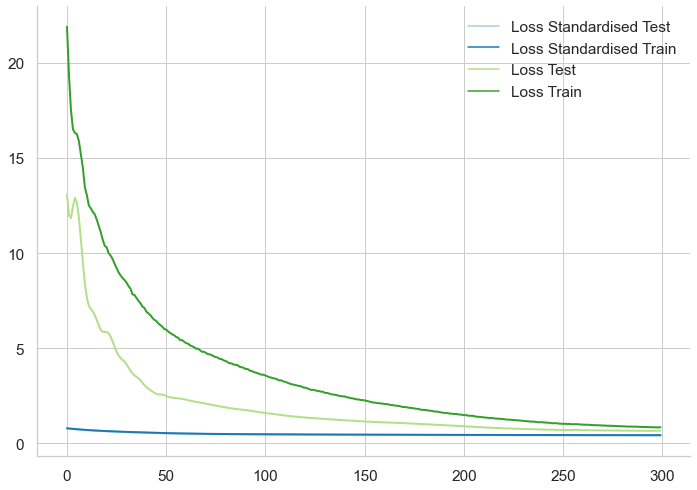

In [11]:
log_data = pd.DataFrame({'Loss Standardised Test': log_standardised.history['val_loss'],
                         'Loss Standardised Train': log_standardised.history['loss'],
                         'Loss Test': log_no.history['val_loss'],
                         'Loss Train': log_no.history['loss']})
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")
sns.despine()
sns.set_context('notebook', font_scale=1.4)
palette = sns.color_palette("Paired", 4)
ax = sns.lineplot(data=log_data, linewidth=2, 
                  palette=palette, dashes=False)
ax.axes.set_ylim(None,None)

(0.36687677204608915, 0.8484290927648545)

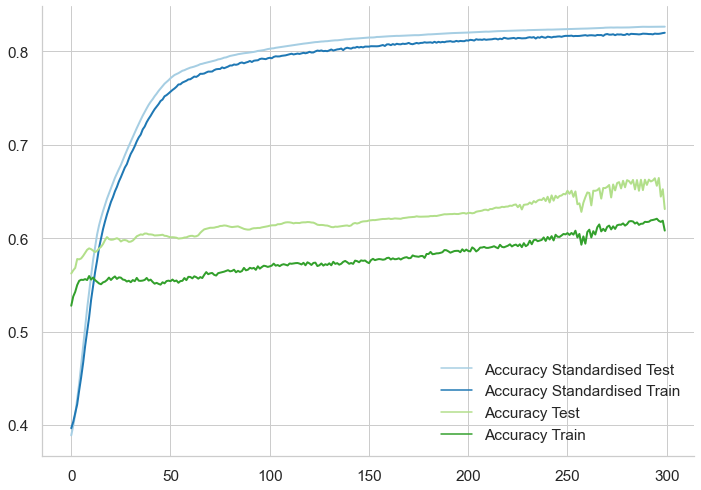

In [12]:
log_data = pd.DataFrame({'Accuracy Standardised Test': log_standardised.history['val_accuracy'],
                         'Accuracy Standardised Train': log_standardised.history['accuracy'],
                         'Accuracy Test': log_no.history['val_accuracy'],
                         'Accuracy Train': log_no.history['accuracy']})
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")
sns.despine()
sns.set_context('notebook', font_scale=1.4)
palette = sns.color_palette("Paired", 4)
ax = sns.lineplot(data=log_data, linewidth=2, 
                  palette=palette, dashes=False)
ax.axes.set_ylim(None,None)

In [13]:
model_standardised = create_baseline()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=3, shuffle=True)

standard = StandardScaler()

x_train = standard.fit_transform(x_train)
x_test = standard.fit_transform(x_test)

log_standardised = History()
model_standardised.fit(x_train, y_train, epochs=10, batch_size=1, 
                       validation_data=(x_test, y_test), 
                       callbacks=[log_standardised], verbose=1)


r = model_standardised.predict(x_test)
r_round = [round(test[0]) for test in r]

successes = 0
for result, value in zip(r_round, y_test):
    if result == value:
        successes+=1
accuracy = abs(round((((len(r_round) - successes)
                       / len(r_round)) * 100) - 100, 5))

print("Accurate predictions:", successes)
print("Accuracy:", accuracy, "%")

Train on 158635 samples, validate on 67987 samples
Epoch 1/10
158635/158635 [==============================] - 177s 1ms/step - loss: 0.4279 - accuracy: 0.8203 - val_loss: 0.4085 - val_accuracy: 0.8312
Epoch 2/10
158635/158635 [==============================] - 172s 1ms/step - loss: 0.4148 - accuracy: 0.8269 - val_loss: 0.4053 - val_accuracy: 0.8322
Epoch 3/10
158635/158635 [==============================] - 181s 1ms/step - loss: 0.4124 - accuracy: 0.8283 - val_loss: 0.4036 - val_accuracy: 0.8316
Epoch 4/10
158635/158635 [==============================] - 176s 1ms/step - loss: 0.4110 - accuracy: 0.8288 - val_loss: 0.4098 - val_accuracy: 0.8320
Epoch 5/10
158635/158635 [==============================] - 175s 1ms/step - loss: 0.4106 - accuracy: 0.8288 - val_loss: 0.4021 - val_accuracy: 0.8342
Epoch 6/10
158635/158635 [==============================] - 177s 1ms/step - loss: 0.4104 - accuracy: 0.8288 - val_loss: 0.4065 - val_accuracy: 0.8342
Epoch 7/10
158635/158635 [=======================

In [14]:
model_no = create_baseline()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=3, shuffle=True)

log_no = History()
model_no.fit(x_train, y_train, epochs=10, batch_size=1,
             validation_data=(x_test, y_test), 
             callbacks=[log_no], verbose=1)


r = model_no.predict(x_test)
r_round = [round(test[0]) for test in r]

successes = 0
for result, value in zip(r_round, y_test):
    if result == value:
        successes+=1
accuracy = abs(round((((len(r_round) - successes)
                       / len(r_round)) * 100) - 100, 5))

print("Accurate predictions:", successes)
print("Accuracy:", accuracy, "%")

Train on 158635 samples, validate on 67987 samples
Epoch 1/10
158635/158635 [==============================] - 171s 1ms/step - loss: 0.6754 - accuracy: 0.7091 - val_loss: 0.4918 - val_accuracy: 0.7808
Epoch 2/10
158635/158635 [==============================] - 172s 1ms/step - loss: 0.5257 - accuracy: 0.7489 - val_loss: 0.4789 - val_accuracy: 0.7932
Epoch 3/10
158635/158635 [==============================] - 178s 1ms/step - loss: 0.5112 - accuracy: 0.7637 - val_loss: 0.4861 - val_accuracy: 0.7857
Epoch 4/10
158635/158635 [==============================] - 177s 1ms/step - loss: 0.5067 - accuracy: 0.7672 - val_loss: 0.4873 - val_accuracy: 0.7911
Epoch 5/10
158635/158635 [==============================] - 185s 1ms/step - loss: 0.5059 - accuracy: 0.7679 - val_loss: 0.4572 - val_accuracy: 0.8017
Epoch 6/10
158635/158635 [==============================] - 170s 1ms/step - loss: 0.5029 - accuracy: 0.7704 - val_loss: 0.4534 - val_accuracy: 0.8093
Epoch 7/10
158635/158635 [=======================

(0.3859347376475314, 0.6892236168730136)

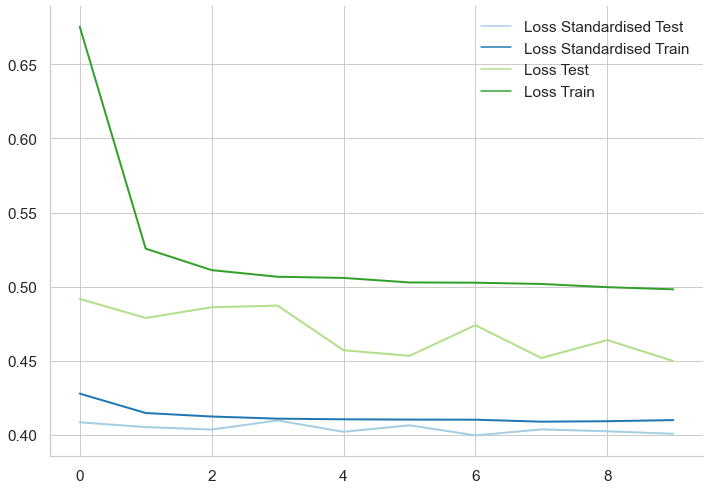

In [15]:
log_data = pd.DataFrame({'Loss Standardised Test': log_standardised.history['val_loss'],
                         'Loss Standardised Train': log_standardised.history['loss'],
                         'Loss Test': log_no.history['val_loss'],
                         'Loss Train': log_no.history['loss']})
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")
sns.despine()
sns.set_context('notebook', font_scale=1.4)
palette = sns.color_palette("Paired", 4)
ax = sns.lineplot(data=log_data, linewidth=2, 
                  palette=palette, dashes=False)
ax.axes.set_ylim(None,None)

(0.7028597682714463, 0.841243913769722)

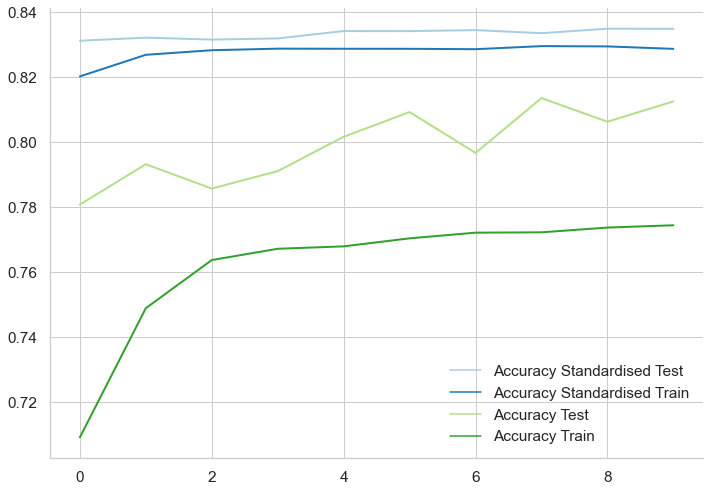

In [16]:
log_data = pd.DataFrame({'Accuracy Standardised Test': log_standardised.history['val_accuracy'],
                         'Accuracy Standardised Train': log_standardised.history['accuracy'],
                         'Accuracy Test': log_no.history['val_accuracy'],
                         'Accuracy Train': log_no.history['accuracy']})
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")
sns.despine()
sns.set_context('notebook', font_scale=1.4)
palette = sns.color_palette("Paired", 4)
ax = sns.lineplot(data=log_data, linewidth=2, 
                  palette=palette, dashes=False)
ax.axes.set_ylim(None,None)

In [17]:
from keras.layers import LeakyReLU

def create_baseline_l():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=18, 
                    kernel_initializer='glorot_uniform'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))
    model.add(Dense(32))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])
    return model

In [18]:
model_standardised = create_baseline_l()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=3, shuffle=True)

standard = StandardScaler()

x_train = standard.fit_transform(x_train)
x_test = standard.fit_transform(x_test)

log_standardised = History()
model_standardised.fit(x_train, y_train, epochs=300, batch_size=256, 
                       validation_data=(x_test, y_test), 
                       callbacks=[log_standardised], verbose=2)


r = model_standardised.predict(x_test)
r_round = [round(test[0]) for test in r]

successes = 0
for result, value in zip(r_round, y_test):
    if result == value:
        successes+=1
accuracy = abs(round((((len(r_round) - successes)
                       / len(r_round)) * 100) - 100, 5))

print("Accurate predictions:", successes)
print("Accuracy:", accuracy, "%")

Train on 158635 samples, validate on 67987 samples
Epoch 1/300
 - 1s - loss: 0.4733 - accuracy: 0.7889 - val_loss: 0.4261 - val_accuracy: 0.8233
Epoch 2/300
 - 1s - loss: 0.4305 - accuracy: 0.8183 - val_loss: 0.4145 - val_accuracy: 0.8277
Epoch 3/300
 - 1s - loss: 0.4229 - accuracy: 0.8226 - val_loss: 0.4115 - val_accuracy: 0.8296
Epoch 4/300
 - 1s - loss: 0.4192 - accuracy: 0.8243 - val_loss: 0.4092 - val_accuracy: 0.8318
Epoch 5/300
 - 1s - loss: 0.4168 - accuracy: 0.8258 - val_loss: 0.4079 - val_accuracy: 0.8311
Epoch 6/300
 - 1s - loss: 0.4151 - accuracy: 0.8272 - val_loss: 0.4057 - val_accuracy: 0.8320
Epoch 7/300
 - 1s - loss: 0.4138 - accuracy: 0.8274 - val_loss: 0.4049 - val_accuracy: 0.8338
Epoch 8/300
 - 1s - loss: 0.4125 - accuracy: 0.8282 - val_loss: 0.4036 - val_accuracy: 0.8335
Epoch 9/300
 - 1s - loss: 0.4116 - accuracy: 0.8281 - val_loss: 0.4028 - val_accuracy: 0.8333
Epoch 10/300
 - 1s - loss: 0.4113 - accuracy: 0.8278 - val_loss: 0.4030 - val_accuracy: 0.8344
Epoch 11

Epoch 87/300
 - 1s - loss: 0.4043 - accuracy: 0.8306 - val_loss: 0.3964 - val_accuracy: 0.8352
Epoch 88/300
 - 1s - loss: 0.4047 - accuracy: 0.8305 - val_loss: 0.3965 - val_accuracy: 0.8351
Epoch 89/300
 - 1s - loss: 0.4044 - accuracy: 0.8308 - val_loss: 0.3967 - val_accuracy: 0.8353
Epoch 90/300
 - 1s - loss: 0.4045 - accuracy: 0.8309 - val_loss: 0.3976 - val_accuracy: 0.8352
Epoch 91/300
 - 1s - loss: 0.4044 - accuracy: 0.8307 - val_loss: 0.3967 - val_accuracy: 0.8353
Epoch 92/300
 - 1s - loss: 0.4041 - accuracy: 0.8301 - val_loss: 0.3966 - val_accuracy: 0.8358
Epoch 93/300
 - 1s - loss: 0.4042 - accuracy: 0.8308 - val_loss: 0.3969 - val_accuracy: 0.8351
Epoch 94/300
 - 1s - loss: 0.4038 - accuracy: 0.8309 - val_loss: 0.3966 - val_accuracy: 0.8356
Epoch 95/300
 - 1s - loss: 0.4046 - accuracy: 0.8308 - val_loss: 0.3965 - val_accuracy: 0.8354
Epoch 96/300
 - 1s - loss: 0.4036 - accuracy: 0.8302 - val_loss: 0.3965 - val_accuracy: 0.8355
Epoch 97/300
 - 1s - loss: 0.4042 - accuracy: 0.83

Epoch 173/300
 - 1s - loss: 0.4038 - accuracy: 0.8304 - val_loss: 0.3959 - val_accuracy: 0.8357
Epoch 174/300
 - 1s - loss: 0.4035 - accuracy: 0.8310 - val_loss: 0.3957 - val_accuracy: 0.8361
Epoch 175/300
 - 1s - loss: 0.4038 - accuracy: 0.8302 - val_loss: 0.3960 - val_accuracy: 0.8358
Epoch 176/300
 - 1s - loss: 0.4041 - accuracy: 0.8310 - val_loss: 0.3955 - val_accuracy: 0.8357
Epoch 177/300
 - 1s - loss: 0.4036 - accuracy: 0.8314 - val_loss: 0.3953 - val_accuracy: 0.8354
Epoch 178/300
 - 1s - loss: 0.4034 - accuracy: 0.8308 - val_loss: 0.3958 - val_accuracy: 0.8357
Epoch 179/300
 - 1s - loss: 0.4041 - accuracy: 0.8307 - val_loss: 0.3951 - val_accuracy: 0.8362
Epoch 180/300
 - 1s - loss: 0.4038 - accuracy: 0.8311 - val_loss: 0.3956 - val_accuracy: 0.8360
Epoch 181/300
 - 1s - loss: 0.4031 - accuracy: 0.8307 - val_loss: 0.3953 - val_accuracy: 0.8359
Epoch 182/300
 - 1s - loss: 0.4032 - accuracy: 0.8308 - val_loss: 0.3962 - val_accuracy: 0.8362
Epoch 183/300
 - 1s - loss: 0.4035 - acc

Epoch 259/300
 - 1s - loss: 0.4030 - accuracy: 0.8311 - val_loss: 0.3950 - val_accuracy: 0.8359
Epoch 260/300
 - 1s - loss: 0.4031 - accuracy: 0.8310 - val_loss: 0.3953 - val_accuracy: 0.8360
Epoch 261/300
 - 1s - loss: 0.4034 - accuracy: 0.8309 - val_loss: 0.3961 - val_accuracy: 0.8357
Epoch 262/300
 - 1s - loss: 0.4029 - accuracy: 0.8309 - val_loss: 0.3950 - val_accuracy: 0.8358
Epoch 263/300
 - 1s - loss: 0.4032 - accuracy: 0.8308 - val_loss: 0.3955 - val_accuracy: 0.8354
Epoch 264/300
 - 1s - loss: 0.4034 - accuracy: 0.8311 - val_loss: 0.3966 - val_accuracy: 0.8355
Epoch 265/300
 - 1s - loss: 0.4031 - accuracy: 0.8316 - val_loss: 0.3957 - val_accuracy: 0.8357
Epoch 266/300
 - 1s - loss: 0.4034 - accuracy: 0.8307 - val_loss: 0.3949 - val_accuracy: 0.8361
Epoch 267/300
 - 1s - loss: 0.4031 - accuracy: 0.8310 - val_loss: 0.3953 - val_accuracy: 0.8358
Epoch 268/300
 - 1s - loss: 0.4038 - accuracy: 0.8306 - val_loss: 0.3960 - val_accuracy: 0.8358
Epoch 269/300
 - 1s - loss: 0.4032 - acc

In [19]:
model_no = create_baseline_l()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, 
                                                    random_state=3, shuffle=True)

log_no = History()
model_no.fit(x_train, y_train, epochs=300, batch_size=256, 
             validation_data=(x_test, y_test), callbacks=[log_no], verbose=1)


r = model_no.predict(x_test)
r_round = [round(test[0]) for test in r]

successes = 0
for result, value in zip(r_round, y_test):
    if result == value:
        successes+=1
accuracy = abs(round((((len(r_round) - successes)
                       / len(r_round)) * 100) - 100, 5))

print("Accurate predictions:", successes)
print("Accuracy:", accuracy, "%")

Train on 158635 samples, validate on 67987 samples
Epoch 1/300
158635/158635 [==============================] - 1s 8us/step - loss: 6.0068 - accuracy: 0.5642 - val_loss: 0.7674 - val_accuracy: 0.5226
Epoch 2/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.7010 - accuracy: 0.6022 - val_loss: 0.6346 - val_accuracy: 0.6317
Epoch 3/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.6711 - accuracy: 0.6231 - val_loss: 0.6047 - val_accuracy: 0.6819
Epoch 4/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.6250 - accuracy: 0.6651 - val_loss: 0.5965 - val_accuracy: 0.6984
Epoch 5/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.6009 - accuracy: 0.6891 - val_loss: 0.5515 - val_accuracy: 0.7243
Epoch 6/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.5841 - accuracy: 0.7013 - val_loss: 0.5373 - val_accuracy: 0.7353
Epoch 7/300
158635/158635 [============================

158635/158635 [==============================] - 1s 6us/step - loss: 0.4243 - accuracy: 0.8197 - val_loss: 0.4106 - val_accuracy: 0.8309
Epoch 56/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4225 - accuracy: 0.8203 - val_loss: 0.4102 - val_accuracy: 0.8303
Epoch 57/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4238 - accuracy: 0.8200 - val_loss: 0.4168 - val_accuracy: 0.8259
Epoch 58/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4233 - accuracy: 0.8200 - val_loss: 0.4114 - val_accuracy: 0.8311
Epoch 59/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4225 - accuracy: 0.8209 - val_loss: 0.4068 - val_accuracy: 0.8318
Epoch 60/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4219 - accuracy: 0.8215 - val_loss: 0.4107 - val_accuracy: 0.8302
Epoch 61/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4223 - accuracy: 0.8202 - val

158635/158635 [==============================] - 1s 6us/step - loss: 0.4187 - accuracy: 0.8230 - val_loss: 0.4059 - val_accuracy: 0.8305
Epoch 110/300
158635/158635 [==============================] - 1s 7us/step - loss: 0.4181 - accuracy: 0.8230 - val_loss: 0.4101 - val_accuracy: 0.8312
Epoch 111/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4179 - accuracy: 0.8224 - val_loss: 0.4053 - val_accuracy: 0.8319
Epoch 112/300
158635/158635 [==============================] - 2s 10us/step - loss: 0.4184 - accuracy: 0.8230 - val_loss: 0.4083 - val_accuracy: 0.8299
Epoch 113/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4193 - accuracy: 0.8222 - val_loss: 0.4096 - val_accuracy: 0.8311
Epoch 114/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4181 - accuracy: 0.8232 - val_loss: 0.4074 - val_accuracy: 0.8306
Epoch 115/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4179 - accuracy: 0.822

158635/158635 [==============================] - 1s 6us/step - loss: 0.4164 - accuracy: 0.8239 - val_loss: 0.4038 - val_accuracy: 0.8324
Epoch 164/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4164 - accuracy: 0.8234 - val_loss: 0.4080 - val_accuracy: 0.8315
Epoch 165/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4164 - accuracy: 0.8237 - val_loss: 0.4048 - val_accuracy: 0.8320
Epoch 166/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4165 - accuracy: 0.8241 - val_loss: 0.4093 - val_accuracy: 0.8298
Epoch 167/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4163 - accuracy: 0.8234 - val_loss: 0.4055 - val_accuracy: 0.8323
Epoch 168/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4164 - accuracy: 0.8244 - val_loss: 0.4067 - val_accuracy: 0.8314
Epoch 169/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4166 - accuracy: 0.8231

158635/158635 [==============================] - 1s 6us/step - loss: 0.4150 - accuracy: 0.8246 - val_loss: 0.4035 - val_accuracy: 0.8325
Epoch 218/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4146 - accuracy: 0.8248 - val_loss: 0.4047 - val_accuracy: 0.8319
Epoch 219/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4145 - accuracy: 0.8252 - val_loss: 0.4036 - val_accuracy: 0.8324
Epoch 220/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4145 - accuracy: 0.8246 - val_loss: 0.4042 - val_accuracy: 0.8321
Epoch 221/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4140 - accuracy: 0.8249 - val_loss: 0.4121 - val_accuracy: 0.8271
Epoch 222/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4140 - accuracy: 0.8252 - val_loss: 0.4043 - val_accuracy: 0.8317
Epoch 223/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4136 - accuracy: 0.8248

158635/158635 [==============================] - 1s 6us/step - loss: 0.4130 - accuracy: 0.8258 - val_loss: 0.4047 - val_accuracy: 0.8319
Epoch 272/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4134 - accuracy: 0.8253 - val_loss: 0.4033 - val_accuracy: 0.8326
Epoch 273/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4136 - accuracy: 0.8250 - val_loss: 0.4064 - val_accuracy: 0.8322
Epoch 274/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4128 - accuracy: 0.8255 - val_loss: 0.4047 - val_accuracy: 0.8319
Epoch 275/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4135 - accuracy: 0.8254 - val_loss: 0.4025 - val_accuracy: 0.8330
Epoch 276/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4125 - accuracy: 0.8264 - val_loss: 0.4020 - val_accuracy: 0.8326
Epoch 277/300
158635/158635 [==============================] - 1s 6us/step - loss: 0.4135 - accuracy: 0.8249

(0.11393501112828491, 0.6)

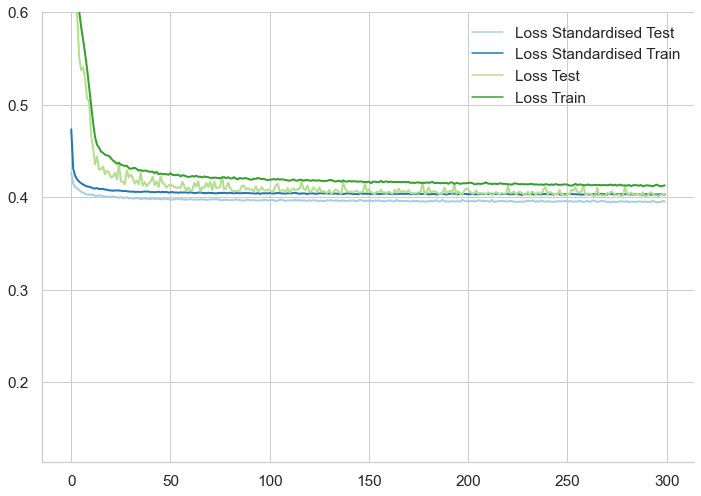

In [20]:
log_data = pd.DataFrame({'Loss Standardised Test': log_standardised.history['val_loss'],
                         'Loss Standardised Train': log_standardised.history['loss'],
                         'Loss Test': log_no.history['val_loss'],
                         'Loss Train': log_no.history['loss']})
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")
sns.despine()
sns.set_context('notebook', font_scale=1.4)
palette = sns.color_palette("Paired", 4)
ax = sns.lineplot(data=log_data, linewidth=2, 
                  palette=palette, dashes=False)
ax.axes.set_ylim(None,0.6)

(0.5069285243749618, 0.8523460417985916)

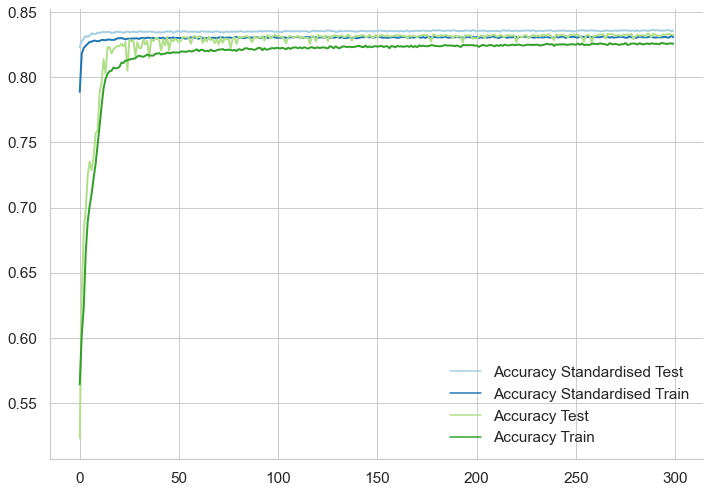

In [21]:
log_data = pd.DataFrame({'Accuracy Standardised Test': log_standardised.history['val_accuracy'],
                         'Accuracy Standardised Train': log_standardised.history['accuracy'],
                         'Accuracy Test': log_no.history['val_accuracy'],
                         'Accuracy Train': log_no.history['accuracy']})
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")
sns.despine()
sns.set_context('notebook', font_scale=1.4)
palette = sns.color_palette("Paired", 4)
ax = sns.lineplot(data=log_data, linewidth=2, 
                  palette=palette, dashes=False)
ax.axes.set_ylim(None,None)